# Coconuts vs Happiness
***

We want to explore the relation between coconuts in a country (or actually its exported number of coconuts) and its happiness score

In [1]:
# Import relevant libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt 
import scipy.stats as stats
import requests
from datetime import datetime
from bs4 import BeautifulSoup

In [3]:
coco=df_data_1.drop(columns=['2017', '2016'])# Dataframe with coconut export data for 2018 
happy=df_data_2 # Dataframe with happiness data for 2018 from Kaggle

In [4]:
# Join the table containing happiness scores and coconut exports
palm=happy.set_index('Country or region').join(coco.set_index('Country/Region'), on='Country or region')
palm=palm.rename(columns={"Rank": "CoconutExporter"}).rename(columns={"2018": "Coconuts"})

In [5]:
# Define a function to overwrite 'NaN' with '0' in a column
def null_to_zero(data, column):
    data[column]=data[column].fillna(0).astype(int)
    return data

Text(0.5, 1.0, 'Happiness Score vs log number of exported coconuts')

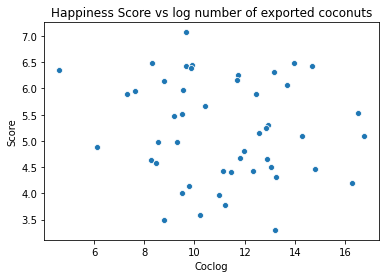

In [6]:
palm["Coconuts"] = palm.Coconuts.astype(float) 
palm["Coclog"] = np.log(palm['Coconuts'], dtype='float64')
sns.scatterplot( x='Coclog',y='Score', data=palm).set_title('Happiness Score vs log number of exported coconuts')

In [7]:
# Our table gets a little make up
palm["Coclog"] = np.log(palm['Coconuts'], dtype='float64')
null_to_zero(null_to_zero(palm,"CoconutExporter"),"Coconuts")
palm['CoconutExporter'] = np.where(palm['CoconutExporter'] > 0, 1, palm['CoconutExporter'])
palm.head()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,CoconutExporter,Coconuts,Coclog
Country or region,,,,,,,,,,,
Finland,1,7.632,1.305,1.592,0.874,0.681,0.202,0.393,0,0,NaN
Norway,2,7.594,1.456,1.582,0.861,0.686,0.286,0.340,0,0,NaN
Denmark,3,7.555,1.351,1.590,0.868,0.683,0.284,0.408,0,0,NaN
Iceland,4,7.495,1.343,1.644,0.914,0.677,0.353,0.138,0,0,NaN
Switzerland,5,7.487,1.420,1.549,0.927,0.660,0.256,0.357,0,0,NaN


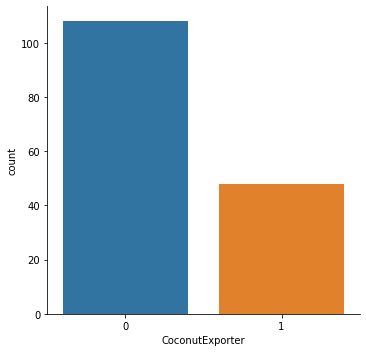

In [8]:
# Around a third of the countries for which we have happiness data exports coconuts
sns.catplot(x="CoconutExporter", kind='count', data=palm)

## Is there a correlation between the amount of exported coconuts and happiness?

__Null Hypothesis__ There is no significant difference in the median happiness of countries which export coconuts and those which do not

Text(0.5, 1.0, 'Median happiness depending on being a coconut exporter')

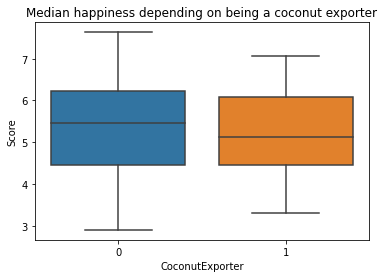

In [9]:
sns.boxplot(x="CoconutExporter", y="Score", data=palm).set_title('Median happiness depending on being a coconut exporter')

In [10]:
# t-test to test the independence of medians
stats.ttest_ind(palm[palm['CoconutExporter'] == 0.0]['Score'], palm[palm['CoconutExporter'] == 1.0]['Score'], equal_var = False)

Ttest_indResult(statistic=1.3589219931567582, pvalue=0.17695803618081984)

Conclusion: The p-Value is bigger than  α=0.05 . Hence we accept the hypothesis and conclude that there is no significant difference in the median happiness